### Some sources are listed down from where the logic was taken and some chuncks of code for DFS-MST


1. [Traveling Salesman Problem (TSP) in Python - GeeksforGeeks](https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-in-python/?utm_source=chatgpt.com)
2. [Traveling Salesman Problem (TSP) Implementation - GeeksforGeeks](https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/?utm_source=chatgpt.com)
3. [Traveling Salesman Problem with Python: Greedy and Brute Force - AskPython](https://www.askpython.com/python/examples/travelling-salesman-problem-python?utm_source=chatgpt.com)
4. [Solving the Traveling Salesman Problem in Python - GuruSoftware](https://www.gurusoftware.com/solving-the-traveling-salesman-problem-in-python/?utm_source=chatgpt.com)
5. [Minimum Cost Path in a Directed Graph via Given Set of Intermediate Nodes - GeeksforGeeks](https://www.geeksforgeeks.org/minimum-cost-path-in-a-directed-graph-via-given-set-of-intermediate-nodes/?utm_source=chatgpt.com)
6. [Python TSP Solver - A pure Python library for solving TSP](https://github.com/fillipe-gsm/python-tsp?utm_source=chatgpt.com)
7. [pyTSP - 2D and 3D visualizations of TSP heuristics](https://github.com/afourmy/pyTSP)
8. [TSP Meta-Heuristic Algorithms - Tabu Search, Genetic Algorithm, Simulated Annealing](https://github.com/topics/travelling-salesman-problem?l=python&utm_source=chatgpt.com)
9. [GitHub - Arkay92/TSP-Christofides-Algorithm](https://github.com/Arkay92/TSP-Christofides-Algorithm?utm_source=chatgpt.com)




In [1]:
import numpy as np
import pandas as pd
import random
import heapq
import time
import matplotlib.pyplot as plt

In [2]:
start_time = time.time()


In [3]:
df = pd.read_csv('Data Set For Test Task - Software Engineer & AI Role (With DSL).csv')
D_node = df.iloc[0:49, :]
N = len(D_node)

In [4]:
# Distance formula 
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)


In [5]:
# initializing N*N size matric
distance_matrix = np.zeros((N, N))

# using a nested loop to take the values if x1,x2,y1 and y2 from the DF. i variable in the loop is for the source and j is for the destination node
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i, j] = euclidean_distance(df.loc[i, 'X'], df.loc[i, 'Y'], df.loc[j, 'X'], df.loc[j, 'Y'])
           


In [6]:
visited = [False] * N 
min_heap = [(0, 0)] 
mst_edges = []  

In [7]:
# Prims Algorithm 
#Prim’s algorithm is also a Greedy algorithm. 
#This algorithm always starts with a single node and moves through several adjacent nodes,
# to explore all of the connected edges along the way.

while min_heap:
    dist, node = heapq.heappop(min_heap)  # Extract the node with the smallest distance
   
    # It will be skiped if the visited[] == true
    if visited[node]:
        continue  
    
    visited[node] = True
    if dist != 0:
        mst_edges.append((prev_node, node))  # Store MST edge
    
    # Add neighbors to the heap
    for neighbor in range(N):
        if not visited[neighbor]:
            heapq.heappush(min_heap, (distance_matrix[node, neighbor], neighbor))
            prev_node = node


In [8]:
#Creating a adjjency list
adj_list = {i: [] for i in range(N)}
for u, v in mst_edges:
    adj_list[u].append(v)
    adj_list[v].append(u)


In [9]:
#Func for DFS 
def dfs(node, visited, order):
    visited[node] = True
    order.append(node)
    
    for neighbor in adj_list[node]:
        if not visited[neighbor]:
            dfs(neighbor, visited, order)


In [10]:
visited_dfs = [False] * N
dfs_order = []
dfs(0, visited_dfs, dfs_order)


In [11]:
tsp_order = dfs_order + [dfs_order[0]]  


In [12]:
total_distance = 0
for i in range(len(tsp_order) - 1):
    total_distance += distance_matrix[tsp_order[i], tsp_order[i + 1]]


In [13]:
start_time = time.time()
print("DFS Traversal Order (TSP Approximation):", tsp_order)
print("Total Distance of the Approximate TSP Path:", total_distance)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")

DFS Traversal Order (TSP Approximation): [0, 20, 24, 19, 22, 27, 15, 14, 28, 13, 8, 4, 3, 5, 12, 37, 38, 46, 47, 48, 45, 43, 42, 44, 33, 32, 2, 7, 11, 10, 9, 6, 21, 1, 17, 16, 18, 23, 25, 26, 29, 34, 30, 36, 35, 31, 39, 40, 41, 0]
Total Distance of the Approximate TSP Path: 195.9465549519243
Execution time: 0.00000 seconds


### Applying Brute Force for Petrol Nodes

In [14]:
# making a set of 9 nodes
arr = [tsp_order[i:i + 9] for i in range(0, len(tsp_order), 9)]

In [15]:
# Extract petrol stations
P_node = df.iloc[49:, 0:1]  
petrol_stations = P_node.values.flatten()  # df to array
petrol_stations



array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115], dtype=int64)

In [16]:
# from the tsp algo the shortest path found will used
#all the nodes at the end and start of the list will be taken to calculate the distance from D_Node to P_Node
result = []
for i, row in enumerate(arr):
    if i == 0:  # First row: exclude first element
        result.append(row[-1])
    elif i == len(arr) - 1:  # Last row: exclude last element
        result.append(row[0])
    else:
        result.append(row[0])
        result.append(row[-1])
        



In [17]:
# Function to get X, Y coordinates from df
def get_coordinates(node_id):
    row = df[df['Stop-ID'] == node_id]
    if not row.empty:
        return row.iloc[0]['X'], row.iloc[0]['Y']
    return None 

# Function to calculate Euclidean distance
def euclidean_distance(id1, id2):
    crd1 = get_coordinates(id1)
    crd2 = get_coordinates(id2)
    if crd1 and crd2:    #if coordinates exists
        return np.sqrt((crd2[0] - crd1[0]) ** 2 + (crd2[1] - crd1[1]) ** 2)
    return 0  

# Calculate distances
min_distances = []
sum=0

for i in range(len(result) - 1):  # Iterate through result nodes
    if i%2 ==0: #As I want even indexes 
                  
        min_distance = float('inf')  # initializing min_distance with infinite
        best_j = None  
        for j in range(len(petrol_stations)):  # Iterate through petrol stations
            d1 = euclidean_distance(result[i], petrol_stations[j])  # result[i] → petrol_station[j]
            d2 = euclidean_distance(petrol_stations[j], result[i + 1])  # petrol_station[j] → result[i+1]
            t_distance = d1 + d2  # Sum of both distances
            
            if t_distance < min_distance:  # If this distance is smaller, update
                min_distance = t_distance
                best_j = j  # Update best j index
        
        # Store the minimum distance and the best j index for the current i
        min_distances.append( petrol_stations[best_j])
        sum+=min_distance

# Print the minimum distances and corresponding j indices
print(min_distances)



[105, 115, 102, 106, 108]


In [18]:

result = []

# Loop through the rows of 'ar' and append the corresponding min_distance value to each row
for i, row in enumerate(arr):
    if i < len(min_distances):  # Ensure only add values from min_distance when i is valid
        new_row = row[:]  # Make a copy of the row
        new_row.append(min_distances[i])  # Append the second value from min_distance
        result.append(new_row)
    else:
        result.append(row[:])  # If no matching min_distance, just add the row as is



In [19]:
# total_distance
# sum
TotalCost=total_distance+sum
TotalCost

224.74847396749706

In [20]:
#makeing the result from 2 Dimensional to 1 dimentional 
flat_array = [item for sublist in result for item in sublist]
print(flat_array)



[0, 20, 24, 19, 22, 27, 15, 14, 28, 105, 13, 8, 4, 3, 5, 12, 37, 38, 46, 115, 47, 48, 45, 43, 42, 44, 33, 32, 2, 102, 7, 11, 10, 9, 6, 21, 1, 17, 16, 106, 18, 23, 25, 26, 29, 34, 30, 36, 35, 108, 31, 39, 40, 41, 0]


In [21]:
df = pd.read_csv('Data Set For Test Task - Software Engineer & AI Role (With DSL).csv')

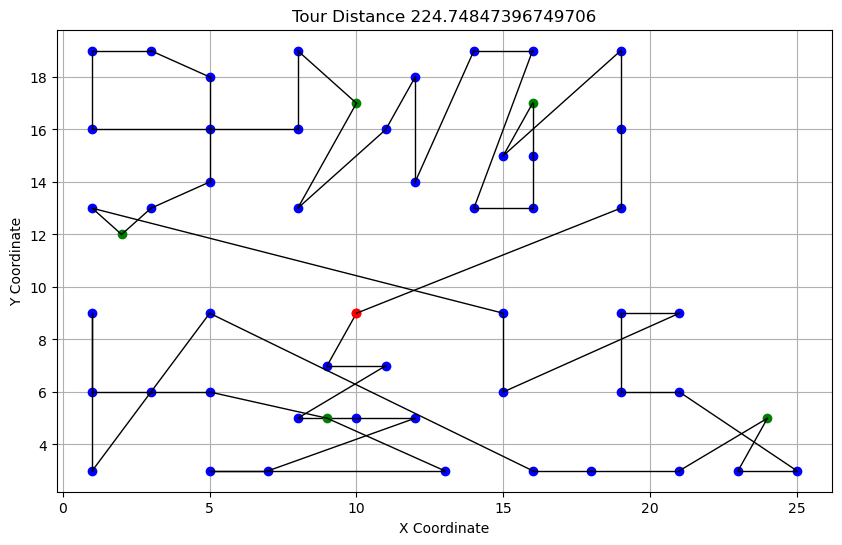

In [22]:
final_array = flat_array

fig, ax = plt.subplots(figsize=(10, 6))
# Initialize previous point to None
prev_x, prev_y = None, None
# Loop to plot the points
for i, value in enumerate(final_array):
    matching_row = df[df['Stop-ID'] == value]
    if not matching_row.empty:  # If a matching Stop-ID is found
        x = matching_row['X'].values[0]
        y = matching_row['Y'].values[0]
                
        # Plot points based on the conditions:
        if i == 0 or i == len(final_array) - 1:  # First and last points in red
            ax.plot(x, y, 'ro')  # Red dot
        elif value < 50:  # Points with Stop-ID less than 50 in blue
            ax.plot(x, y, 'bo')  # Blue dot
        elif value > 100:  # Points with Stop-ID greater than 100 in green
            ax.plot(x, y, 'go')  # Green dot
        
        # Draw a line to the previous point if it's not the first point
        if prev_x is not None and prev_y is not None:
            ax.plot([prev_x, x], [prev_y, y], 'k-', lw=1)  # Black line between points
        
        # Update the previous point
        prev_x, prev_y = x, y
    else:
        print("Not Found", {value})

# Add labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title(f'Tour Distance {TotalCost}')

# Display the plot
plt.grid(True)
plt.show()


In [23]:
# **Final Outputs**
print("TSP Approximation:", tsp_order)
print("TSP Approximation + Brute_Force:", final_array)
print("Total Cost (TSP + Petrol):", TotalCost)


TSP Approximation: [0, 20, 24, 19, 22, 27, 15, 14, 28, 13, 8, 4, 3, 5, 12, 37, 38, 46, 47, 48, 45, 43, 42, 44, 33, 32, 2, 7, 11, 10, 9, 6, 21, 1, 17, 16, 18, 23, 25, 26, 29, 34, 30, 36, 35, 31, 39, 40, 41, 0]
TSP Approximation + Brute_Force: [0, 20, 24, 19, 22, 27, 15, 14, 28, 105, 13, 8, 4, 3, 5, 12, 37, 38, 46, 115, 47, 48, 45, 43, 42, 44, 33, 32, 2, 102, 7, 11, 10, 9, 6, 21, 1, 17, 16, 106, 18, 23, 25, 26, 29, 34, 30, 36, 35, 108, 31, 39, 40, 41, 0]
Total Cost (TSP + Petrol): 224.74847396749706
